In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [10]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)
X.shape

(250, 2)

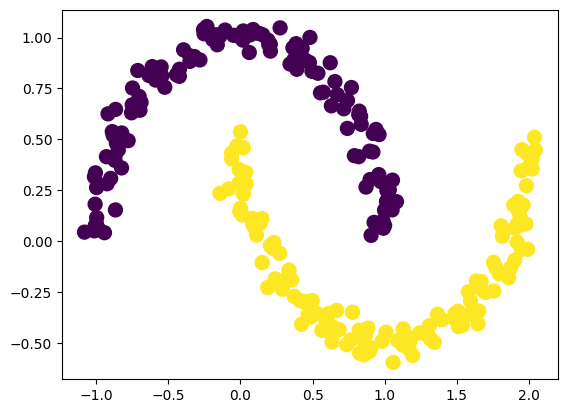

In [12]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)

In [13]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [14]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/Users/suraj/Documents/Deep learning/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            'accuracy'
        ]
    )

In [18]:
model.get_weights()[0]

array([[ 0.09098309,  0.6630463 , -0.04334265,  0.46903878,  0.03692973,
         0.48074013, -0.33700705,  0.5918036 ,  0.4090293 , -0.238875  ],
       [-0.5645373 ,  0.22210866,  0.06966251,  0.00842464,  0.49520558,
         0.2253769 ,  0.13673991,  0.3066178 ,  0.04881716, -0.33760804]],
      dtype=float32)

In [19]:
old_weights  = model.get_weights()[0]

In [20]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
history = model.fit(X_train, y_train, epochs=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4900 - loss: 0.7582


In [22]:
new_weights = model.get_weights()[0]

In [23]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [24]:
gradient = (new_weights - old_weights)/ model.optimizer.get_config()['learning_rate']
percent_change = abs(100*(old_weights - new_weights)/old_weights) # weight change in percentage  before and after one epoch

In [25]:
gradient

array([[-0.00050664,  0.00077486,  0.00146031, -0.00149012,  0.00112876,
        -0.00110269,  0.00062585,  0.00101328, -0.00035763,  0.00040233],
       [ 0.00065565, -0.0012815 , -0.00215322,  0.00250246, -0.00160933,
         0.00172853, -0.00093877, -0.00166893,  0.00055134, -0.00059605]],
      dtype=float32)

In [26]:
percent_change

array([[5.56850166e-04, 1.16863688e-04, 3.36923054e-03, 3.17695725e-04,
        3.05651594e-03, 2.29372556e-04, 1.85707919e-04, 1.71218780e-04,
        8.74333127e-05, 1.68427563e-04],
       [1.16139556e-04, 5.76969760e-04, 3.09092761e-03, 2.97041051e-02,
        3.24981287e-04, 7.66952871e-04, 6.86539279e-04, 5.44303039e-04,
        1.12940406e-03, 1.76549845e-04]], dtype=float32)

In [27]:
old_weights

array([[ 0.09098309,  0.6630463 , -0.04334265,  0.46903878,  0.03692973,
         0.48074013, -0.33700705,  0.5918036 ,  0.4090293 , -0.238875  ],
       [-0.5645373 ,  0.22210866,  0.06966251,  0.00842464,  0.49520558,
         0.2253769 ,  0.13673991,  0.3066178 ,  0.04881716, -0.33760804]],
      dtype=float32)

In [28]:
new_weights

array([[ 0.09098259,  0.6630471 , -0.04334119,  0.4690373 ,  0.03693086,
         0.48073903, -0.33700642,  0.5918046 ,  0.40902895, -0.2388746 ],
       [-0.56453663,  0.22210738,  0.06966036,  0.00842714,  0.49520397,
         0.22537863,  0.13673897,  0.30661613,  0.04881771, -0.33760864]],
      dtype=float32)

In [29]:
#   we can see that the gradients are very small and the weights have not changed much. This is the vanishing gradient problem. 

### how to solve it?

In [ ]:
#  use a shallower network

In [31]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/Users/suraj/Documents/Deep learning/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.get_weights()[0]

array([[-0.529004  ,  0.028772  ,  0.50863856, -0.22993079,  0.6564134 ,
         0.3148976 , -0.14664018,  0.31946605, -0.22514442, -0.09903699],
       [-0.15101331, -0.68784803,  0.00768405,  0.35994214,  0.6999764 ,
        -0.23843569,  0.13504678, -0.6032834 ,  0.13272077,  0.47500724]],
      dtype=float32)

In [34]:
old_weights = model.get_weights()[0]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4900 - loss: 0.7012
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4900 - loss: 0.6975 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4900 - loss: 0.6956 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4900 - loss: 0.6936
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.6917 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4900 - loss: 0.6909 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4900 - loss: 0.6900 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7350 - loss: 0.6895 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8100 - loss: 0.6889 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8300 - loss: 0.6885 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8050 - loss: 0.6881 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8100 - loss

In [37]:
new_weights = model.get_weights()[0]

In [38]:
model.optimizer.get_config()["learning_rate"]

0.0010000000474974513

In [39]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [40]:
gradient

array([[  471.33514,  -251.26173,  -458.57303,   499.44168,   624.6303 ,
         -483.05075,   533.08093,  -270.62183,   453.1489 ,   521.4066 ],
       [-1031.0844 ,   639.9985 ,   992.14404,  -958.4468 ,  -882.9747 ,
          950.7208 ,  -949.5572 ,   750.804  ,  -942.2424 ,  -909.0237 ]],
      dtype=float32)

In [41]:
percent_change

array([[   89.09861 ,   873.28577 ,    90.15695 ,   217.21394 ,
           95.15807 ,   153.39932 ,   363.52994 ,    84.71067 ,
          201.27034 ,   526.4766  ],
       [  682.77716 ,    93.043594, 12911.73    ,   266.278   ,
          126.1435  ,   398.7326  ,   703.1321  ,   124.452965,
          709.9435  ,   191.37048 ]], dtype=float32)

In [42]:
old_weights

array([[-0.529004  ,  0.028772  ,  0.50863856, -0.22993079,  0.6564134 ,
         0.3148976 , -0.14664018,  0.31946605, -0.22514442, -0.09903699],
       [-0.15101331, -0.68784803,  0.00768405,  0.35994214,  0.6999764 ,
        -0.23843569,  0.13504678, -0.6032834 ,  0.13272077,  0.47500724]],
      dtype=float32)

In [43]:
new_weights

array([[-1.0003392 ,  0.28003374,  0.9672116 , -0.7293725 ,  0.03178304,
         0.79794836, -0.6797211 ,  0.5900879 , -0.67829335, -0.62044364],
       [ 0.8800711 , -1.3278465 , -0.98446006,  1.3183889 ,  1.5829511 ,
        -1.1891565 ,  1.084604  , -1.3540875 ,  1.0749632 ,  1.3840309 ]],
      dtype=float32)

In [44]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/Users/suraj/Documents/Deep learning/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(
        optimizer= 'Adam',
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[
            'accuracy'
        ])

In [46]:
old_weights  = model.get_weights()[0]

In [47]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5100 - loss: 0.6925
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 0.6893 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 0.6851 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 0.6792 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 0.6708 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6250 - loss: 0.6597 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8150 - loss: 0.6461 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8250 - loss: 0.6266 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8400 - loss: 0.6016 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8350 - loss: 0.5741 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8350 - loss: 0.5436 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8400 - loss

In [48]:
new_weights = model.get_weights()[0]

In [49]:
model.optimizer.get_config()["learning_rate"]


0.0010000000474974513

In [50]:
gradient = (old_weights - new_weights)/ 0.001
percent_change = abs(100*(old_weights - new_weights)/ old_weights)

In [51]:
old_weights

array([[ 0.45373982, -0.3644684 , -0.15475261,  0.07135969,  0.20515704,
        -0.21344277, -0.3608382 ,  0.27737784, -0.69606495, -0.10139352],
       [-0.52114546,  0.03247935, -0.44545004, -0.45589808,  0.65113276,
        -0.33368772, -0.36504176, -0.35204637, -0.60214424,  0.4942569 ]],
      dtype=float32)

In [52]:
new_weights

array([[ 0.50803643, -0.51751417, -0.27461752, -0.07218994,  0.38518193,
        -0.37065804, -0.51857424,  0.29869175, -0.6203852 , -0.06543477],
       [-0.60407364,  0.08341645, -0.3438928 , -0.43555632,  0.5058235 ,
        -0.19963512, -0.23674567, -0.5598429 , -0.6846601 ,  0.6614786 ]],
      dtype=float32)

In [54]:
gradient

array([[ -54.29661 ,  153.04576 ,  119.86491 ,  143.54962 , -180.02489 ,
         157.21526 ,  157.73602 ,  -21.313904,  -75.67972 ,  -35.95875 ],
       [  82.92818 ,  -50.9371  , -101.55722 ,  -20.341753,  145.30927 ,
        -134.0526  , -128.29608 ,  207.79651 ,   82.51583 , -167.22166 ]],
      dtype=float32)

In [55]:
percent_change

array([[ 11.966464 ,  41.991505 ,  77.455826 , 201.16347  ,  87.7498   ,
         73.656876 ,  43.713783 ,   7.684069 ,  10.872509 ,  35.464546 ],
       [ 15.912674 , 156.82921  ,  22.798792 ,   4.4619083,  22.316381 ,
         40.17307  ,  35.14559  ,  59.025326 ,  13.703665 ,  33.832943 ]],
      dtype=float32)